# Chapter 3: Building Models with Keras

In [4]:
%matplotlib inline
import keras
from keras.layers import Dense
from keras.models import Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

Using TensorFlow backend.


## Data Wrangle the Boston House Price Dataset

In [5]:
# For info on the dataset: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
colnames = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = pd.read_csv(dataset_url, delim_whitespace=True, names=colnames)

# Get a gist of your data
dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Note that there is one catagorical variable (CHAS)
# Apply one hot encoding (also called dummy variables)
dataframe = pd.get_dummies(dataframe, columns=["CHAS"])

# Print the new columns
dataframe.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CHAS_0', 'CHAS_1'],
      dtype='object')

In [7]:
# Set the target values as the median value of houses
# Set all other variables as the explanatory variables
# Use the zscore to standardize the numerical variables
targets = zscore(dataframe.MEDV)
predictors = zscore(dataframe.drop("MEDV", axis=1).as_matrix())

## Build Your First (Regression) Model with Keras!

#### Set up the Architecture

In [8]:
# Set the number of columns: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add a hidden layer
model.add(Dense(n_cols, activation='relu', input_shape=(n_cols,)))

# Add the output layer
model.add(Dense(1, input_shape=(n_cols,)))

#### Compile the model

In [9]:
# Use the adam optimizer and mean_squared_error loss function
model.compile(optimizer="sgd", loss='mse', metrics=["mse"])

In [10]:
# Fit the model
history = model.fit(predictors, targets, epochs=10)

Epoch 1/10
506/506 [==============================] - 0s - loss: 0.5602 - mean_squared_error: 0.5602     
Epoch 2/10
506/506 [==============================] - 0s - loss: 0.4155 - mean_squared_error: 0.4155     
Epoch 3/10
506/506 [==============================] - 0s - loss: 0.3498 - mean_squared_error: 0.3498     
Epoch 4/10
506/506 [==============================] - 0s - loss: 0.3084 - mean_squared_error: 0.3084     
Epoch 5/10
506/506 [==============================] - 0s - loss: 0.2831 - mean_squared_error: 0.2831     
Epoch 6/10
506/506 [==============================] - 0s - loss: 0.2637 - mean_squared_error: 0.2637     
Epoch 7/10
506/506 [==============================] - 0s - loss: 0.2514 - mean_squared_error: 0.2514     
Epoch 8/10
506/506 [==============================] - 0s - loss: 0.2403 - mean_squared_error: 0.2403     
Epoch 9/10
506/506 [==============================] - 0s - loss: 0.2332 - mean_squared_error: 0.2332     
Epoch 10/10
506/506 [=========================

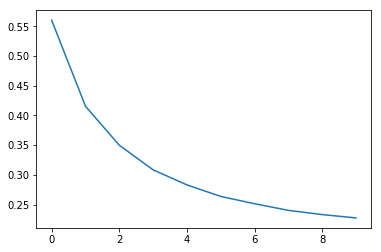

In [11]:
plt.plot(history.history['mean_squared_error'])

### How well can the model aproximate simple functions?

In [ ]:
# Set the number of columns: n_cols
n_cols = predictors.shape[1]
print(predictors)
# Set up the model: model
model = Sequential()

# Add a hidden layer
# model.add(Dense(8, activation='tanh', input_shape=(n_cols,)))

# Add a hidden layer
model.add(Dense(4, activation='tanh', input_shape=(n_cols,)))

# Add a hidden layer
model.add(Dense(4, activation='elu'))

# Add the output layer
model.add(Dense(1))
# model.add(Dense(1))

# Use the adam optimizer and mean_squared_error loss function
SGD = keras.optimizers.sgd(lr=.03)
model.compile(optimizer=SGD, loss='mse', metrics=["mse", "accuracy", ])


In [ ]:
# Fit the model
log = {"mse":[], "R2":[]}
training_iterations = 20

model.fit(predictors, targets, epochs=0, verbose=0)
log["mse"] = history.history['mean_squared_error']
log["R2"] = history.history['coeff_determination']
predictions = model.predict(predictors)
plt.plot(predictors, predictions, alpha=.1, color=(0, 0.2, 0.5))

print(predictors)
print(predictions)

    
for i in range(training_iterations):
    history = model.fit(predictors, targets, epochs=10, batch_size=10, verbose=0)
    predictions = model.predict(predictors)
    plt.plot(predictors, predictions, alpha=(i+1)/training_iterations, color=((i+1)/training_iterations, 0.2, 0.5))
    log["mse"].extend(history.history['mean_squared_error'])
    log["R2"].extend(history.history['coeff_determination'])

plt.plot(predictors, targets, 'ro', markersize=2, color="orange")
plt.show()

In [69]:
# %matplotlib notebook
# import numpy as np
# import matplotlib.pyplot as plt

# m = 100
# n = 100
# matrix = np.random.normal(0,1,m*n).reshape(m,n)

# fig = plt.figure()
# ax = fig.add_subplot(111)
# plt.ion()

# fig.show()
# fig.canvas.draw()

# for i in range(0,10):
#     ax.clear()
#     ax.plot(matrix[i,:])
#     fig.canvas.draw()

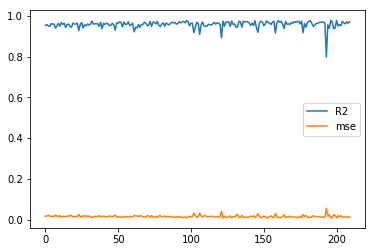

Final Loss (MSE): 0.01058
Final Accuracy (R^2): 0.97065


In [73]:
# fig, axs = plt.subplots(1,2)
# pd.Series(log["mse"]).plot(ax=axs[0])
# pd.Series(log["acc"]).plot(ax=axs[1])
plt.plot(log["R2"])
plt.plot(log["mse"])
plt.legend(['R2', 'mse'], loc='best')
plt.show()
print("Final Loss (MSE):", round(log["mse"][-1], 5))
print("Final Accuracy ():", round(log["mse"][-1], 5))

## Build Your First (Classification) Model with Keras!

In [ ]:
# Do all the data wrangling on the backend
%run data_wrangling_titantic.ipynb

#### Build Model Architecture

In [ ]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = Sequential()

# Add a hidden layer
model.add(Dense(n_cols, activation='relu', input_shape=(n_cols,)))

# Add the output layer
# Notice a softmax activation on the output
model.add(Dense(2, activation='softmax'))

#### Compile the model

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

#### Fit the model

In [ ]:
model.fit(predictors, targets)

#### Predict with the Model

In [ ]:
# Make a fake person (out-of-data sample) to predict the odds of survival
new_data = {'Age' : [10], 'SibSp' : [2], 'Parch' : [2], 'Fare' : [500],
            'Sex_female' : [1], 'Sex_male' : [0],
            'Pclass_1' : [0], 'Pclass_2' : [1], 'Pclass_3' : [0],
            'Embarked_C' : [0], 'Embarked_Q' : [0], 'Embarked_S' : [1]}
df = pd.DataFrame(data=new_data)
pred_data = df.as_matrix()

# Calculate predictions: predictions
new_prediction = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_survival = new_prediction[:,1]

# print predicted_prob_true
print(predicted_prob_survival)